In [72]:
# First `pip install mord`

import mord 
import numpy as np
import pandas as pd
from scipy.stats import spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/home/gleech/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


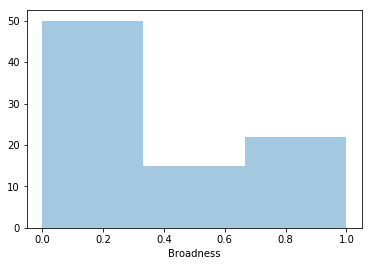

In [68]:
# How many counts of each Broadness value?

df = pd.read_csv("~/Documents/Code/argmin-gravitas/img/ranked_philosophers.csv")
sns.distplot(df.Broadness, kde=False)


In [75]:
# What's the monotonic relationship? 
print( spearmanr(df.Broadness, df.Rank) )

# What's the average agreement of Rank-Broadness pairs?
kendalltau(df.Broadness, df.Rank)

# : Significant and in agreement: 
# Broadness up, rank down (better).


SpearmanrResult(correlation=-0.22663763108609986, pvalue=0.034779998827042344)


KendalltauResult(correlation=-0.17438424357872878, pvalue=0.03940659084559974)

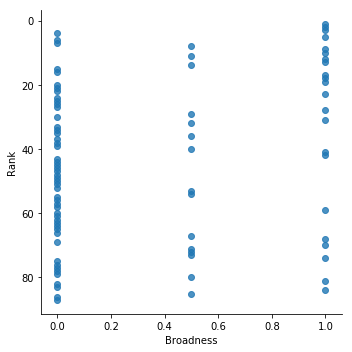

In [77]:
# NB: THE FIT LINE ISN'T VALID: rank is not interval data.
# Eyeball linear relation

sns.lmplot(x="Broadness", y="Rank", data=df, fit_reg=False)
plt.gca().invert_yaxis()

# See below

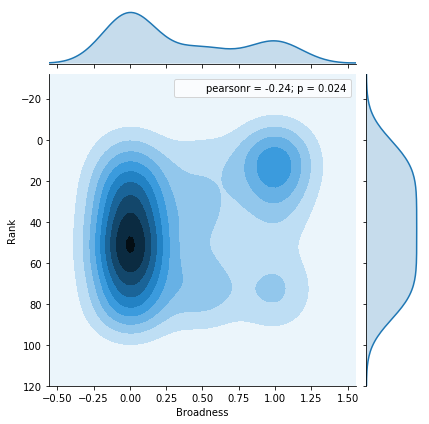

In [67]:
dens = sns.jointplot(x="Broadness", y="Rank", data=df, kind="kde")
plt.gca().invert_yaxis()
plt.show()

In [105]:
# Try cumulative odds ordinal regression with proportional odds

# do we have proportional odds?
# "each independent variable has an identical effect at each cumulative split of the ordinal dependent variable"
# Don't need to check 'parallelism' per se, because only have 1 predictor at the moment.

# Plot residuals from fitting a line to every rank:
# Did this in R:
"""
path <- "ranked_philosophers.csv"
mydata <- read_csv(path)
y <- as.factor(mydata$Rank)
Y <- as.numeric(y) - 1
ncut <- length(unique(Y)) - 1
nVars = 1  # total no. of coefficients less intercepts

Coef <- matrix(NA, ncol=nVars, nrow=ncut,
               dimnames=list(paste('>=', levels(y)[-1],sep=''),
                             NULL))
for(k in 1:ncut) {
  f <- lrm(Y >= k ~ Broadness, data=mydata)
  Coef[k,] <- coef(f)[-1]
}
colnames(Coef) <- names(coef(f))[-1]
residual <- round(Coef, 3)
plot(residual)
"""

<img src="../../img/broad/linear_partial_residuals.png" width="50%" />

Flat, except for weird large errors at either extreme of the ranking

In [145]:
# Baseline model: always reply mean rank (#44)
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error

features = df.drop(["Name", "Rank"], axis=1)

model = DummyRegressor("mean")
model.fit(features, df.Rank)

preds = model.predict(features)
mean_absolute_error(df.Rank, preds)



21.74712643678161

In [150]:
# Ordinal logistic model, All-Threshold 
model = mord.LogisticAT(alpha=0., verbose=True) # no regularisation
model.fit(features, df.Rank)

# Neg abs error
model.score(features, df.Rank)



b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'


-20.57471264367816